# Linear Models

For regression: linear regression

For classification: logistic regression

feature engineering -? 

### mean_squared_error vs mean_absolute_error 

example of use mean_squared_error

In [ ]:
from sklearn.metrics import mean_squared_error

inferred_body_mass = linear_regression.predict(data)
model_error = mean_squared_error(target, inferred_body_mass)
print(f"The mean squared error of the optimal model is {model_error:.2f}")

example of use mean_absolute_error 

In [ ]:
from sklearn.metrics import mean_absolute_error

model_error = mean_absolute_error(target, inferred_body_mass)
print(f"The mean absolute error of the optimal model is {model_error:.2f} g")

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# data with two rows and a single column, i.e. two samples and a single feature
data = [[1], [2]]
target = [1, 2]

model.fit(data, target)

print(f'coef_: {model.coef_}')
print(f'coef_ shape: {model.coef_.shape}')
print(f'intercept_: {model.intercept_}')

to plot the data and the prediction of the linear regression model - example

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

date_reshape = data.reshape(-1, 1)
linear_regression = LinearRegression()
linear_regression.fit(date_reshape , target)

predictions = linear_regression.predict(date_reshape)

ax = sns.scatterplot(data=full_data, x="data", y="target", color="black",
                     alpha=0.5)
_ = ax.plot(date_reshape , predictions)
_ = plt.title("Model using LinearRegression from scikit-learn")

exemple of Linear Regresion with data 

data generation

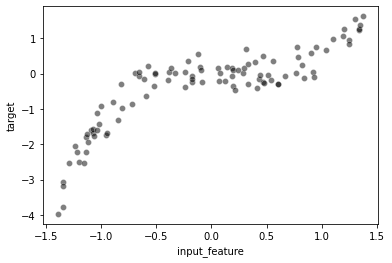

In [1]:
import numpy as np

rng = np.random.RandomState(0)

n_sample = 100
data_max, data_min = 1.4, -1.4
len_data = (data_max - data_min)
# sort the data to make plotting easier later
data = np.sort(rng.rand(n_sample) * len_data - len_data / 2)
noise = rng.randn(n_sample) * .3
target = data ** 3 - 0.5 * data ** 2 + noise

import pandas as pd

full_data = pd.DataFrame({"input_feature": data, "target": target})

import seaborn as sns

_ = sns.scatterplot(data=full_data, x="input_feature", y="target",
                    color="black", alpha=0.5)

use LinearRegresion 

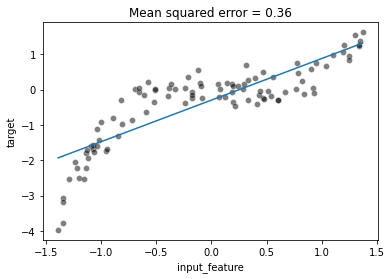

In [12]:
# X should be 2D for sklearn: (n_samples, n_features)
data = data.reshape((-1, 1))
data.shape

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_regression = LinearRegression()
linear_regression.fit(data, target)
target_predicted = linear_regression.predict(data)

mse = mean_squared_error(target, target_predicted)

ax = sns.scatterplot(data=full_data, x="input_feature", y="target",
                     color="black", alpha=0.5)
ax.plot(data, target_predicted)
_ = ax.set_title(f"Mean squared error = {mse:.2f}")





It is important to note that the learnt model will not be able to handle the
non-linear relationship between `data` and `target` since linear models
assume the relationship between `data` and `target` to be linear.

Indeed, there are 3 possibilities to solve this issue:

1. choose a model that can natively deal with non-linearity,
2. engineer a richer set of features by including expert knowledge which can
   be directly used by a simple linear model, or
3. use a "kernel" to have a locally-based decision function instead of a
   global linear decision function.

Let's illustrate quickly the first point by using a decision tree regressor
which can natively handle non-linearity.

AD1. Exemple of DecisionTreeRegressor

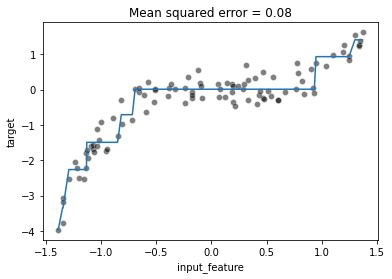

In [4]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=3).fit(data, target)
target_predicted = tree.predict(data)

mse = mean_squared_error(target, target_predicted)

ax = sns.scatterplot(data=full_data, x="input_feature", y="target",
                     color="black", alpha=0.5)
ax.plot(data, target_predicted)
_ = ax.set_title(f"Mean squared error = {mse:.2f}")

Ad.2 
Instead of having a model which can natively deal with non-linearity, we
could also modify our data: we could create new features, derived from the
original features, using some expert knowledge. In this example, we know that
we have a cubic and squared relationship between `data` and `target` (because
we generated the data).

Indeed, we could create two new features (`data ** 2` and `data ** 3`) using
this information as follows. This kind of transformation is called a
polynomial feature expansion:


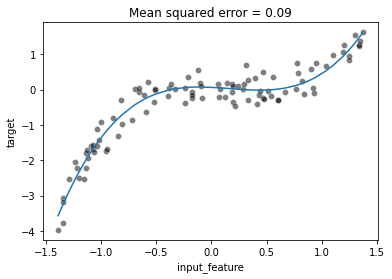

In [5]:
data_expanded = np.concatenate([data, data ** 2, data ** 3], axis=1)

linear_regression.fit(data_expanded, target)
target_predicted = linear_regression.predict(data_expanded)
mse = mean_squared_error(target, target_predicted)

ax = sns.scatterplot(data=full_data, x="input_feature", y="target",
                     color="black", alpha=0.5)
ax.plot(data, target_predicted)
_ = ax.set_title(f"Mean squared error = {mse:.2f}")

Example with PolynomialFeatures

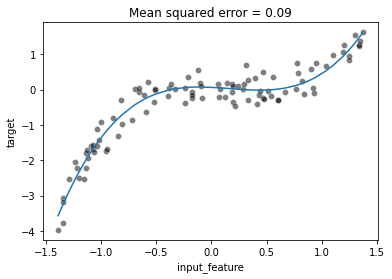

In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=3),
    LinearRegression(),
)
polynomial_regression.fit(data, target)
target_predicted = polynomial_regression.predict(data)
mse = mean_squared_error(target, target_predicted)

ax = sns.scatterplot(data=full_data, x="input_feature", y="target",
                     color="black", alpha=0.5)
ax.plot(data, target_predicted)
_ = ax.set_title(f"Mean squared error = {mse:.2f}")

Ad3 Example of support vector machines  - SVM 

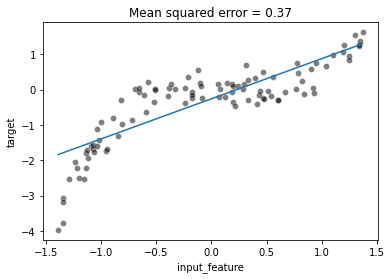

In [7]:
#support vector machine with a linear kernel:
from sklearn.svm import SVR

svr = SVR(kernel="linear")
svr.fit(data, target)
target_predicted = svr.predict(data)
mse = mean_squared_error(target, target_predicted)

ax = sns.scatterplot(data=full_data, x="input_feature", y="target",
                     color="black", alpha=0.5)
ax.plot(data, target_predicted)
_ = ax.set_title(f"Mean squared error = {mse:.2f}")

#The predictions of our SVR with a linear kernel are all aligned on a straight line. 
# SVR(kernel="linear") is indeed yet another example of a linear model.

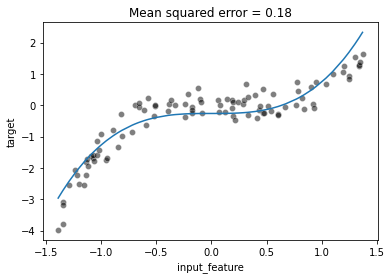

In [8]:
#support vector machine with a non-linear kernel: 
from sklearn.svm import SVR

svr = SVR(kernel="poly", degree=3)
svr.fit(data, target)
target_predicted = svr.predict(data)
mse = mean_squared_error(target, target_predicted)

ax = sns.scatterplot(data=full_data, x="input_feature", y="target",
                     color="black", alpha=0.5)
ax.plot(data, target_predicted)
_ = ax.set_title(f"Mean squared error = {mse:.2f}")


Kernel methods such as SVR are very efficient for small to medium datasets.

For larger datasets with `n_samples >> 10_000`, it is often computationally
more efficient to perform explicit feature expansion using
`PolynomialFeatures` or other non-linear transformers from scikit-learn such
as
[KBinsDiscretizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html)
or
[Nystroem](https://scikit-learn.org/stable/modules/generated/sklearn.kernel_approximation.Nystroem.html).

Here again we refer the interested reader to the documentation to get a
proper definition of those methods. The following just gives an intuitive
overview of the predictions we would get using those on our toy dataset:

Example of KBinsDiscretizer

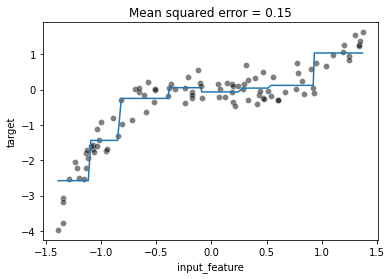

In [9]:
from sklearn.preprocessing import KBinsDiscretizer

binned_regression = make_pipeline(
    KBinsDiscretizer(n_bins=8), LinearRegression(),
)
binned_regression.fit(data, target)
target_predicted = binned_regression.predict(data)
mse = mean_squared_error(target, target_predicted)

ax = sns.scatterplot(data=full_data, x="input_feature", y="target",
                     color="black", alpha=0.5)
ax.plot(data, target_predicted)
_ = ax.set_title(f"Mean squared error = {mse:.2f}")

Example of Nystroem

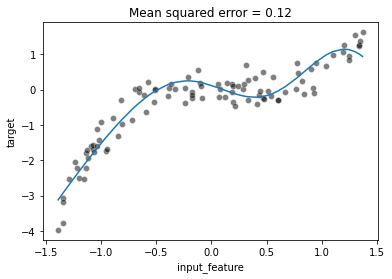

In [10]:
from sklearn.kernel_approximation import Nystroem

nystroem_regression = make_pipeline(
    Nystroem(n_components=5), LinearRegression(),
)
nystroem_regression.fit(data, target)
target_predicted = nystroem_regression.predict(data)
mse = mean_squared_error(target, target_predicted)

ax = sns.scatterplot(data=full_data, x="input_feature", y="target",
                     color="black", alpha=0.5)
ax.plot(data, target_predicted)
_ = ax.set_title(f"Mean squared error = {mse:.2f}")